Todo:
- Kolik zahraničních a kolik českých jmen se ve zkoumaným období protočilo v rádiích (tipuju že českých bude výrazně míň > z českých imho točíme dokola léta ta samá jména jen třeba s novýma písničkama)

In [2]:
import os
import pandas as pd

In [3]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))
wikid = pd.read_json(os.path.join("wikidata","wikidata.json"))
df = df.merge(wikid, on="interpret_hlavni", how="outer")

## Co v těch datech vlastně máme

In [4]:
df[['interpret_hlavni','zeme_puvodu']].sample(10)

,interpret_hlavni,zeme_puvodu
75521,G-Eazy,Spojené státy americké
1101,Victoria,NaN
68068,Robin Schulz,Německo
3941,Green Day,Spojené státy americké
43287,Kristina,Slovensko
73619,Sigala,Spojené království
82048,Timmy White,NaN
9846,Maroon 5,Spojené státy americké
44756,Calvin Harris,Spojené království
71531,Kygo,Singapur


In [5]:
len(df[~df['zeme_puvodu'].isnull()]) / len(df)

0.8373332159055881

To je slušný.

## Nejzastoupenější země

In [6]:
df.groupby('zeme_puvodu').size().nlargest(20)

zeme_puvodu
Spojené státy americké     21943
Česko                      19197
Spojené království         13072
Kanada                      2598
Německo                     2286
Švédsko                     2033
Slovensko                   1892
Francie                     1748
Nizozemsko                  1110
Austrálie                   1087
Španělsko                    951
Barbados                     768
Irsko                        584
Belgie                       557
Švýcarsko                    513
Kolumbie                     492
Finsko                       465
Rumunsko                     428
Braniborské markrabství      386
Singapur                     348
dtype: int64

In [7]:
def pomer(x, y):
    return (df[(df['zeme_puvodu'] == x) & (df['pozice'] <= y)].groupby('rok').size() / df[(~df['zeme_puvodu'].isnull()) & (df['pozice'] <= y)].groupby('rok').size()).plot.bar()

<Axes: xlabel='rok'>

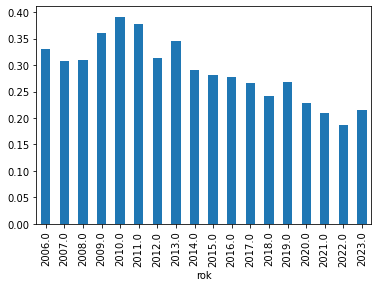

In [8]:
pomer('Spojené státy americké', 100)

<Axes: xlabel='rok'>

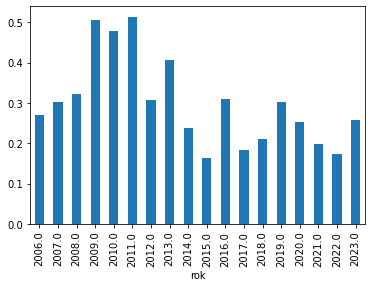

In [9]:
pomer('Spojené státy americké', 10)

<Axes: xlabel='rok'>

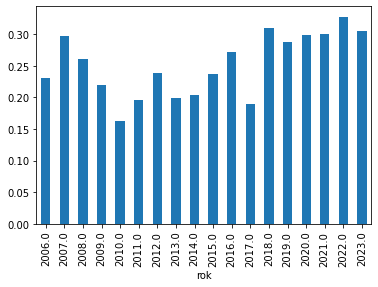

In [10]:
pomer('Česko', 100)

<Axes: xlabel='rok'>

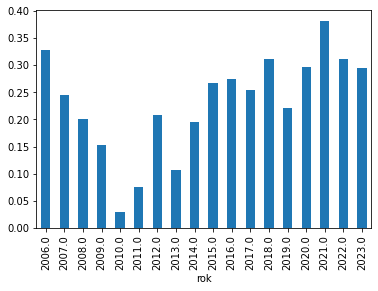

In [11]:
pomer('Česko', 10)

<Axes: xlabel='rok'>

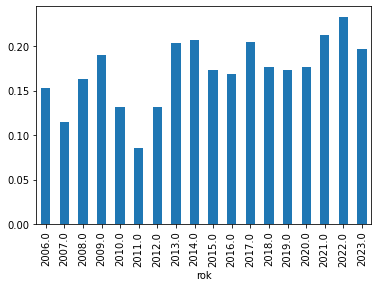

In [12]:
pomer('Spojené království', 100)

<Axes: xlabel='rok'>

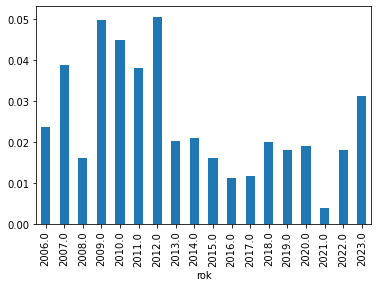

In [13]:
pomer('Slovensko', 100)

<Axes: xlabel='rok'>

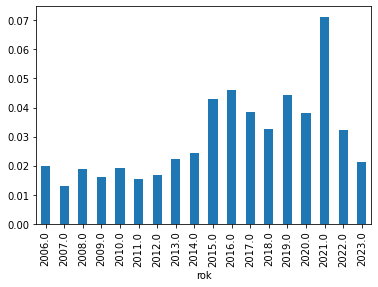

In [14]:
pomer('Německo', 100)

## Jak se točí domácí x zahraniční

In [15]:
df[~df['zeme_puvodu'].isnull() & (df['zeme_puvodu'] == "Česko")].groupby('interpret_hlavni')['track'].nunique().mean()

3.0069444444444446

In [16]:
df[~df['zeme_puvodu'].isnull() & (df['zeme_puvodu'] != "Česko")].groupby('interpret_hlavni')['track'].nunique().mean()

3.2883895131086143

## Délka kariér

In [67]:
top_zeme = df.explode('zeme_puvodu').groupby('zeme_puvodu').size().nlargest(10).index.to_list()

In [68]:
df['delka_pusobeni'] = df['rok'] - df['zacatek_pusobeni']

In [69]:
df[df['zeme_puvodu'].isin(top_zeme)].groupby('zeme_puvodu')['delka_pusobeni'].mean().sort_values().head(60)

zeme_puvodu
Spojené království         9.774898
Německo                    9.819066
Švédsko                    9.996038
Kanada                    10.374465
Spojené státy americké    13.194122
Nizozemsko                14.012635
Austrálie                 14.197040
Česko                     16.943807
Francie                   17.499421
Slovensko                 18.822562
Name: delka_pusobeni, dtype: float64

Nejosvědčenější zřejmě musí být interpreti ze Slovenska, naopak ze Spojeného království je přebíráme relativně krátce po založení.

Bacha! Nemůže to nějak zkreslovat to, že jsou data až od roku 2006?

## Brno x Praha

In [34]:
len(df[df['misto_puvodu'] == 'Brno']) / len(df[df['misto_puvodu'] == 'Praha'])

0.04654895666131621

Velmi disproporční, podobně jako u filmu, ale na tahle data bych pro velké soudy nespoléhal :/

## Versus žánry

In [27]:
zanryxmista = df.explode('zanry').explode('zeme_puvodu')
zanryxmista = zanryxmista[['zanry','zeme_puvodu']].dropna()

Vyřazuji z toho pop.

In [42]:
pd.DataFrame(zanryxmista[~zanryxmista['zanry'].str.contains('pop',na=False)].groupby(['zeme_puvodu','zanry']).size().nlargest(30)).rename(columns={0:'count'})

count
zeme_puvodu            zanry                            
Spojené státy americké hip hop                      7128
                       contemporary R&B             6363
                       alternativní rock            4392
                       rock                         3771
Česko                  rock                         3141
Spojené státy americké elektronická taneční hudba   2565
                       taneční hudba                2232
                       soul                         2046
                       rhythm and blues             1937
Spojené království     alternativní rock            1823
                       soft rock                    1703
Česko                  alternativní rock            1679
Spojené státy americké reggae                       1642
                       elektronická hudba           1592
Spojené království     rock                         1515
Spojené státy americké electro house                1401
Spojené království     contemporary R&B             1355
Spojené státy americké trap                         1319
                       funk                         1288
                       country                      1281
                       house music                  1254
Spojené království     soul                         1193
Spojené státy americké Southern hip hop             1181
                       gospel                       1177
                       reggaeton                    1157
                       hip house                    1155
                       dirty south                  1145
Spojené království     rhythm and blues             1101
Spojené státy americké punk rock                    1096
Spojené království     folk                         1064